# Data Analysis with Python Pandas
In this notebook you will be going through the basics of interrogating and analysing data in Python with the Pandas package.  __[Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)__, using data structures known as Dataframes which arrange data in a form similar to an excel spreadsheet, is a very powerful tool for quickly and effectively working with tabular data.  In this practical we will be investigating the [Climate Change: Earth Surface Temperature](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data/data) dataset available on the Kaggle website.  We will learn to: load a .csv file into a dataframe; explore the data held in the dataframe; convert time information from string form into more useful time objects; subset a dataframe; reduce a dataframe through the groupby method; fit a simple model using the numpy package; and finally do some visualisation.  This might seem like a lot of things to do, but Pandas makes most of it quite straightforward!    

## Loading in Python Packages
Prior to doing any work on the data, we need to make sure that the packages that we will be using are accesible in this notebook.  This is done with the __<font color=green>import</font>__ statement, which in effect makes the package available for use within Python. We need to import pandas, numpy and pyplot from matplotlib for this practical.

In [144]:
# let's import the packages we are going to be using
import pandas as pd  # here we use the'as' keyword to give an alias to pandas to make it quicker to type.
import numpy as np
import matplotlib.pyplot as plt

## Reading in the dataset
The data we are going to be using is in .csv format.  These files are in a comma separated value form (hence .csv) and are very easily read in by Pandas using the __[read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)__ method.  Pandas has a lot of different methods!  Finding the right one for the task might seem problematic, however the [documentation](http://pandas.pydata.org/pandas-docs/stable/) is your friend here (along with Google) and is very well put together.  Let's move on and get the data read in.    

In [234]:
fname = 'data/surface_temps/GlobalLandTemperaturesByCountry.csv'
df = pd.read_csv(fname)

In [235]:
# First a little preprocessing to get rid of non-countries, and also to retain only European parts of colonial countries.

df = df[~df['Country'].isin(
    ['Denmark', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

df = df.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

## First look at the data
So we have now loaded the data into the __df__ variable.  However, it would be good to have an idea of: what sort of variable it is?  What does it contain?  How many observations are there? And so on...  Let's answer some of these questions now.

In [236]:
type(df)  # what type of variable is df?

pandas.core.frame.DataFrame

Ok, so it is a Pandas __[DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)__.  This is the key data structure in Pandas.  How about getting a look at some of the data?

In [237]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


The __[head](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html)__ method lets us see the first 5 entries of the dataframe.  Notice that a DataFrame has a similar structure to an Excel table, and that is a good way to think about it.  It is a set of numbered rows and named columns, which each row being a data sample and each column being a feature of the data.  Also, the __[tail](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html)__ method lets us look at the end of the dataframe...

In [238]:
df.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe
577461,2013-09-01,NaN,NaN,Zimbabwe


So, what are the data features contained in the dataframe?  Most are self explanatory.  But lets go through them anyway, just so we are sure.  The first set of rows are the data indexes, from this we can see that there are 577461 data samples.  The __dt__ column gives us the date at a monthly resolution, __AverageTemperature__ the mean temperature for that month, __AverageTemperatureUncertainty__ the 95% confidence interval around the average (so we are 95% certain the true mean temperature is this close to the reported mean), and the __Country__.  How about the NaNs?  These represent Not a Number, and mean here that there is missing data.  We can also get information on the type of data held within the DataFrame amongst other things, using the __[info](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html)__ method:  

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558299 entries, 0 to 577461
Data columns (total 4 columns):
dt                               558299 non-null object
AverageTemperature               526013 non-null float64
AverageTemperatureUncertainty    526752 non-null float64
Country                          558299 non-null object
dtypes: float64(2), object(2)
memory usage: 21.3+ MB


Here we can see the number of entries in each column, along with the datatype.

We can also get basic statistics on the numerical data using __[describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)__:

In [239]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,526013.000000,526752.000000
mean,17.486337,1.007586
std,10.760884,1.182045
min,-37.658000,0.052000
25%,10.458000,0.325000
50%,21.304000,0.570000
75%,25.902000,1.190000
max,38.842000,15.003000


 Let's now take a closer look at the information contained in a column, in this case __dt__.

## Closer look at a DataFrame column
Firstly, before we go into the __dt__ column in more details, let's have a look at what data type a column is in Pandas?  Is it still a DataFrame?

In [241]:
type(df.dt)

pandas.core.series.Series

Ok, so it is a Pandas __[Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)__.  It is always good to know what data type you are working with, as then you can more easily know what methods you might be able to apply to it.  Also, note that we use dot notation to access the series.  There are other ways, but I find this easiest to remember.  How about the datatype of the data samples contained in the series? To do this, let's first select one of the items in the series using the __[iloc](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)__ method, and then check its type.

In [242]:
time_sample = df.dt.iloc[0]  # here we access the 0th entry of the dt series
time_sample, type(time_sample)

('1743-11-01', str)

So, the time-samples are of type string, which essentially means that they are text.  We can turn them into something that may be more useful for data analysis, in the form of a timestamp.  Timestamps allow us to work with time data much more easily.  So let's have a go convert from string to a timestamp with Pandas using the __[to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)__ method. 

In [243]:
time_sample = pd.to_datetime(time_sample)
time_sample

Timestamp('1743-11-01 00:00:00')

So using this method we have converted our string to a time object and this gives us a potentially more useful datatype for doing timeseries analysis.  Let apply this to the entire __dt__ series to convert them all from strings to timestamps:  

In [244]:
df.dt = pd.to_datetime(df.dt)  

So what have done above is reassign the rows in __dt__ column so that each sample now contains the the timestamp generated from the string that was previously in the row.  It should be mentioned that converting from strings to datetimes is not always as easy as this, as the string formats for time can be quite variable, but there is plenty of information in the to_datetime documentation showing you how to deal with different formats.  Now check the dataframe info again to see what has changed.  Note that __dt__ is now of type datetime, which is what we want.   

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558299 entries, 0 to 577461
Data columns (total 4 columns):
dt                               558299 non-null datetime64[ns]
AverageTemperature               526013 non-null float64
AverageTemperatureUncertainty    526752 non-null float64
Country                          558299 non-null object
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 21.3+ MB


## Subsetting a Dataframe
Rather than working with all the data in a DataFrame it is sometimes useful to subset it down to a more specific set of samples.  In this instance we are going to subset to all observations since January 1970 as it is in this period that global temperatures have been rising the fastest.  There are various methods to subset the dataframe.  We are going to reset in the index to the Datetime column and then do the subsetting based on the index, but you can do this similarly using any column.

In [246]:
df.set_index('dt', inplace=True)  # the inplace keyword means we don't have to make a copy of the dataframe

In [247]:
df_1970_present = df[df.index>='1970-01-01']
df_1970_present.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1970-01-01,-6.495,0.584,Åland
1970-02-01,-10.835,0.478,Åland
1970-03-01,-1.583,0.608,Åland
1970-04-01,0.493,0.463,Åland
1970-05-01,6.939,0.565,Åland


## Doing some data analysis
Now lets find the five countries with the largest and the five with the smallest relatvie temperature changed since 1970.  One way to do this (though maybe not the best way!) is to fit a line to the annual mean temperature time series, and then the slope, __m__, provides indication of the rate of change in temperature through time.  Let's first investigate this with one example country:

In [248]:
df_1970_present_UK = df_1970_present[df_1970_present.Country == 'United Kingdom']
df_1970_present_UK.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1970-01-01,3.531,0.287,United Kingdom
1970-02-01,2.594,0.227,United Kingdom
1970-03-01,3.648,0.279,United Kingdom
1970-04-01,5.886,0.296,United Kingdom
1970-05-01,11.569,0.297,United Kingdom


To get the annual mean temperatures we will need to use a Pandas function called __[groupby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)__.  This lets you aggregate data which has a shared variable value, in this case the year of the index:

In [249]:
what_to_group = df_1970_present_UK.index.year
variables_of_interest = {'AverageTemperature': np.mean}

grouped_df_1970_present_UK = df_1970_present_UK.groupby(what_to_group).agg(variables_of_interest)
grouped_df_1970_present_UK.head()

,AverageTemperature
dt,
1970,8.814250
1971,9.243583
1972,8.657583
1973,8.955500
1974,8.916583


Now that we have our yearly observations let's plot the timeseries for the UK to have a look at it using __[plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)__:

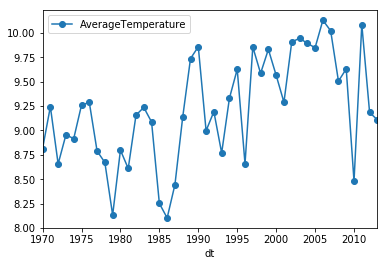

In [250]:
grouped_df_1970_present_UK.plot(marker='o')
plt.show()  # need to use matplotlib here to get it to display!

Now let's fit a line to these data points using the numpy package, specifically the __[polyfit](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html)__ method:

In [251]:
x = grouped_df_1970_present_UK.index
y = grouped_df_1970_present_UK.AverageTemperature
order = 1  # by setting the order to 1 we get a linear fit.
m, c = np.polyfit(x, y, order)  # the slope, m, gives us the rate of change in temperature per year.
print m, c

0.0231359995302 -36.8574074583


Now using the linear model we have generated let's make a 'fit' column with it in the dataframe that will allow us to visualise it:

In [252]:
grouped_df_1970_present_UK['fit'] = m*x + c  # y = mx + c,  the equation of a line

0.0231359995302 degress C per year


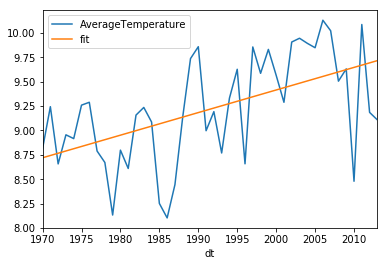

In [253]:
print m, 'degress C per year'
grouped_df_1970_present_UK.plot()
plt.show()

Ok, so since 1970 you could argue from this data that there has been a ~1 degree celcius rise in land surface temperature in the United Kingdom.  Now let's find the those countries where the temperature is changing most and least quickly, as determined by the slope, __m__. 

# Additional Exercises (Optional)

### Countries with Most and Least quickly changing temperatures

To determine the rate of temperature change in any given country we again need to group the monthly data into years, but this time we also need to group by country.  This will give us the annual temperature for every country since 1970:

In [254]:
what_to_group = [df_1970_present.index.year, df_1970_present.Country]
variables_of_interest = {'AverageTemperature': np.mean}

grouped_df_1970_present_global = df_1970_present.groupby(what_to_group).agg(variables_of_interest)
grouped_df_1970_present_global.head()

AverageTemperature
dt   Country                           
1970 Afghanistan              14.783083
     Albania                  12.839667
     Algeria                  23.322833
     American Samoa           26.760667
     Andorra                  11.376583

Now that we have a double index in the dataframe (indexed on dt and Country) it is helpful to reset the index to something more managable, and move the index values back into the dataframe itself.  Let's do that:

In [271]:
grouped_df_1970_present_global.reset_index(inplace=True)  # here resetting index makes it easier to work with
grouped_df_1970_present_global.head()

,index,dt,Country,AverageTemperature
0,0,1970,Afghanistan,14.783083
1,1,1970,Albania,12.839667
2,2,1970,Algeria,23.322833
3,3,1970,American Samoa,26.760667
4,4,1970,Andorra,11.376583


Now we need to evalute the annual temperature time series for each country.  This is going to require a Python __for loop__, where we step over each country, subset the dataframe to only those rows with information relevant to the current country and then get the slope using the numpy polyfit method:

In [256]:
countries = []  # create a list to hold the country information
rate_of_temperature_change = [] # create a list to hold the slope information
for country in set(grouped_df_1970_present_global.Country):  # loop over the set of countries 
    
    # lets get the grouped data for the current country under analysis
    country_df = grouped_df_1970_present_global[grouped_df_1970_present_global.Country == country]
    try:
        
        # do the polyfit
        x = country_df.dt
        y = country_df.AverageTemperature
        order = 1
        m, c = np.polyfit(x, y, order)
        
        countries.append(country)
        rate_of_temperature_change.append(m)
    except:
        continue  

We now have two lists, containing the information on the the slope, i.e. the rate of temperature change per annum, and also the country.  Let's generate a Pandas dataframe from these two lists:

In [257]:
rate_of_temp_change_df = pd.DataFrame({'Country': countries,
                                       'Temp_Slope': rate_of_temperature_change})
rate_of_temp_change_df.head()

,Country,Temp_Slope
0,Canada,0.050503
1,Federated States Of Micronesia,0.016683
2,Turkmenistan,0.045378
3,Lithuania,0.032930
4,Cambodia,0.016047


For the last step, let's sort the values in the new dataframe, and then print out the five countries with the largest rates of temperature change since 1970 using the __head__ method, and then the five countries with the smallest rates of temperature change since 1970 using the __tail__ method.

In [272]:
rate_of_temp_change_df.sort_values('Temp_Slope', ascending=False, inplace=True)

In [273]:
rate_of_temp_change_df.head()

,Country,Temp_Slope
41,Greenland,0.062985
32,Svalbard And Jan Mayen,0.055275
0,Canada,0.050503
132,Iran,0.047523
2,Turkmenistan,0.045378


In [274]:
rate_of_temp_change_df.tail()

,Country,Temp_Slope
68,Peru,0.008841
127,Palau,0.007446
37,New Zealand,0.006111
11,Bolivia,0.005147
211,Timor Leste,0.002701


So we now know which countries have experienced the largest and smallest rates of annual temperature change since 1970.  Finally, as an additional step let's visualise it for all countries with Plotly:

## Visualisation with Plotly

In [270]:
import plotly as pl
import plotly.offline as py
py.init_notebook_mode(connected=True)

data = [ dict(
        type = 'choropleth',
        locations = rate_of_temp_change_df.Country,
        z = rate_of_temp_change_df.Temp_Slope,
        locationmode = 'country names',
        text = rate_of_temp_change_df.Country,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '\n°C/yr')
            )
       ]

layout = dict(
    title = 'Rate of Temperature Change since 1970 by Country',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 0,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')